# Predicting blood donations using machine learning
Using data science and machine learning we will build a model to predict if a person will donate blood or not

In [1]:
# import all tools

# Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("transfusion.csv")
df.shape

(748, 5)

In [3]:
#data exploration
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df["whether he/she donated blood in March 2007"].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

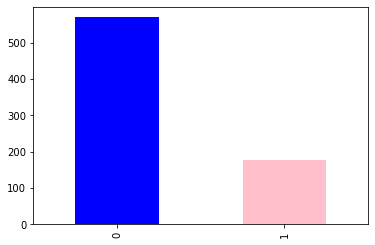

In [5]:
df["whether he/she donated blood in March 2007"].value_counts().plot(kind="bar", color=["blue", "pink"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [7]:
df.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [58]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [9]:
#Renaming the target column
df=df.rename(columns={'whether he/she donated blood in March 2007':'target'})
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [10]:
df["Recency (months)"].value_counts().sort_index()

0       5
1       9
2     173
3      13
4     156
5       6
6       5
7       8
8       6
9      20
10      3
11     84
12      6
13      5
14     76
15      2
16     63
17      1
18      2
20      1
21     44
22      1
23     50
25      1
26      1
35      1
38      2
39      1
40      1
72      1
74      1
Name: Recency (months), dtype: int64

In [11]:
df["Frequency (times)"].value_counts().sort_index()

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
10     14
11     22
12     14
13      9
14     13
15      6
16     13
17      4
18      1
19      2
20      2
21      2
22      2
23      1
24      3
26      1
33      1
34      1
38      1
41      1
43      1
44      1
46      1
50      1
Name: Frequency (times), dtype: int64

In [12]:
df["Monetary (c.c. blood)"].value_counts()

250      158
500      112
750       87
1000      62
1250      62
1500      52
1750      43
2000      31
2250      24
2750      22
2500      14
3000      14
4000      13
3500      13
3250       9
3750       6
4250       4
6000       3
4750       2
5250       2
5500       2
5000       2
8250       1
12500      1
9500       1
11500      1
5750       1
8500       1
6500       1
4500       1
11000      1
10750      1
10250      1
Name: Monetary (c.c. blood), dtype: int64

In [13]:
pd.crosstab(df["target"], df["Frequency (times)"])

Frequency (times),1,2,3,4,5,6,7,8,9,10,...,24,26,33,34,38,41,43,44,46,50
target,,,,,,,,,,,,,,,,,,,,,
0,138,93,73,49,42,35,31,18,18,8,...,3,0,0,0,1,0,0,1,0,0
1,20,19,14,13,20,17,12,13,6,6,...,0,1,1,1,0,1,1,0,1,1


In [14]:
pd.crosstab(df["target"], df["Recency (months)"])

Recency (months),0,1,2,3,4,5,6,7,8,9,...,22,23,25,26,35,38,39,40,72,74
target,,,,,,,,,,,,,,,,,,,,,
0,3,7,107,8,98,4,3,7,5,16,...,0,49,1,0,1,2,1,1,1,1
1,2,2,66,5,58,2,2,1,1,4,...,1,1,0,1,0,0,0,0,0,0


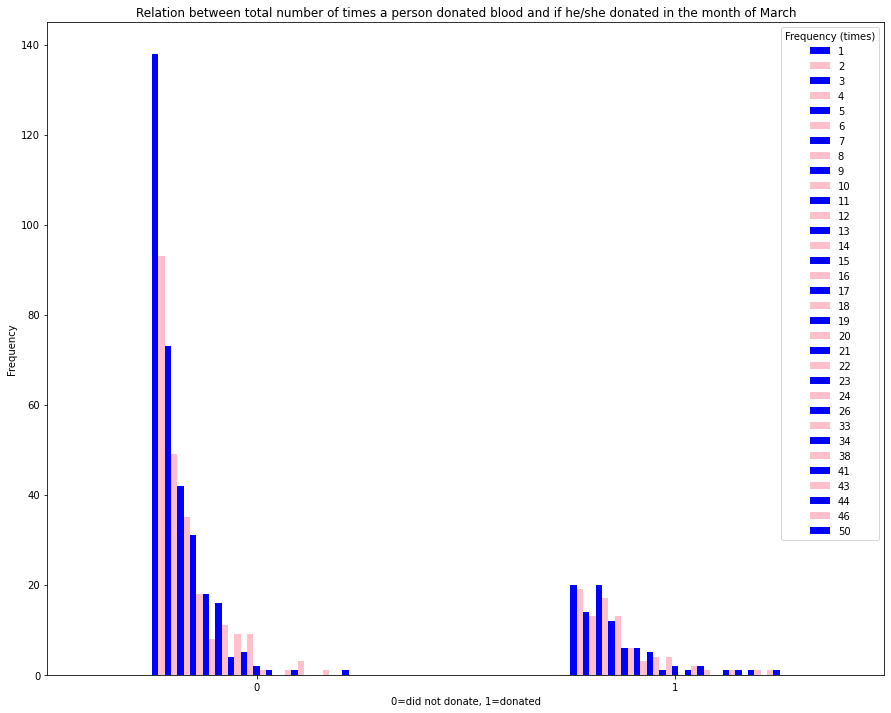

In [15]:
pd.crosstab(df["target"], df["Frequency (times)"]).plot(kind="bar", figsize=(15, 12), color=["blue", "pink"])
plt.title("Relation between total number of times a person donated blood and if he/she donated in the month of March")
plt.xlabel("0=did not donate, 1=donated")
plt.ylabel("Frequency")
plt.xticks(rotation=0);

In [16]:
#correlation matrix
corr_matrix=df.corr()
corr_matrix

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
target,-0.279869,0.218633,0.218633,-0.035854,1.000000


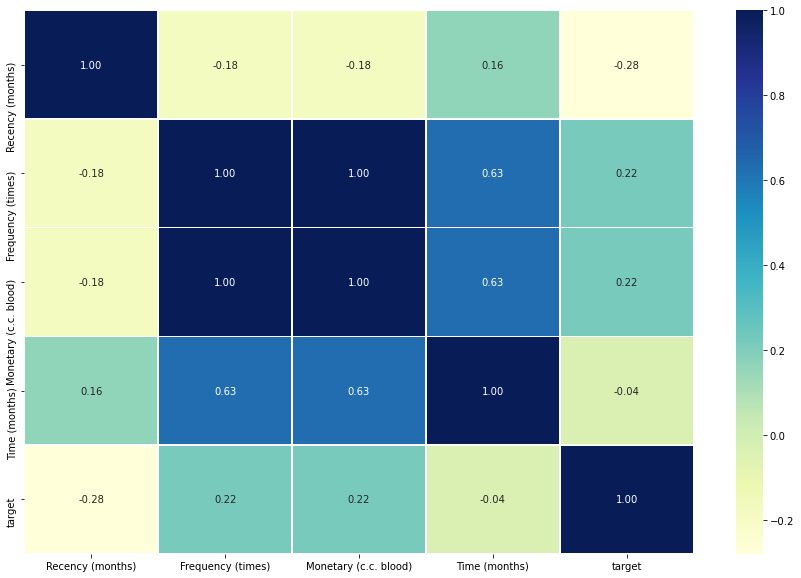

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [18]:
#modeling
np.random.seed(42)
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(598, 4) (150, 4) (598,) (150,)


In [20]:
X_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
529,2,6,1500,22
271,16,7,1750,28
455,21,1,250,21
175,11,10,2500,35
309,16,3,750,19


In [21]:
y_train, len(y_train)

(529    1
 271    0
 455    0
 175    0
 309    0
       ..
 623    0
 681    0
 3      1
 366    0
 308    0
 Name: target, Length: 598, dtype: int64,
 598)

In [22]:
X_test.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
514,4,16,4000,38
417,16,1,250,16
497,38,1,250,38
91,4,2,500,4
312,12,9,2250,60


In [23]:
y_test, len(y_test)

(514    1
 417    0
 497    0
 91     0
 312    0
       ..
 668    0
 86     0
 42     1
 344    0
 300    0
 Name: target, Length: 150, dtype: int64,
 150)

In [24]:
#creating dictionary with models
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression()}

#function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed=42
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores= fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

{'KNN': 0.7666666666666667, 'Logistic Regression': 0.7666666666666667}

<AxesSubplot:>

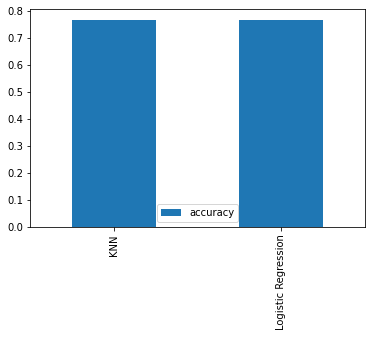

In [26]:
#model comparison
model_compare= pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

In [27]:
# Tuning hyperparameters

#KNN hyperparameters
knn_grid = {"n_neighbors": np.arange(1, 21, 2),
            "metric": ["euclidean", "manhattan", "minkowski"],
            "weights": ["uniform", "distance"]}

# Logistic Regression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


In [28]:
#Tuning KNN model with GridSearchCV

gs_knn_grid= GridSearchCV(KNeighborsClassifier(), param_grid=knn_grid, cv=5, verbose=True)
gs_knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    4.4s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [29]:
gs_knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [30]:
gs_knn_grid.score(X_test, y_test)

0.78

In [31]:
#Tuning Logistic Regression model with GridSearchCV

gs_log_reg_grid= GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
gs_log_reg_grid.best_params_

{'C': 0.0018329807108324356, 'solver': 'liblinear'}

In [59]:
gs_log_reg_grid.score(X_test, y_test)

0.7733333333333333

In [37]:
#Evaluating classification model
y_preds=gs_log_reg_grid.predict(X_test)

In [38]:
y_preds

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

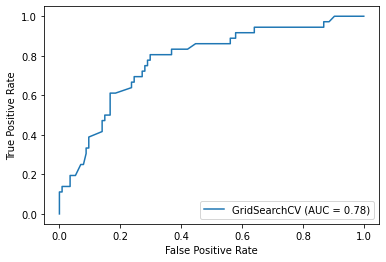

In [34]:
#Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg_grid, X_test, y_test)

In [40]:
print(confusion_matrix(y_test, y_preds))

[[110   4]
 [ 30   6]]


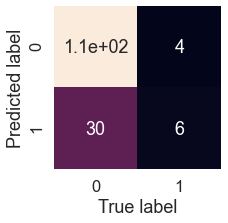

In [44]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [45]:
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       114
           1       0.60      0.17      0.26        36

    accuracy                           0.77       150
   macro avg       0.69      0.57      0.56       150
weighted avg       0.74      0.77      0.72       150



In [46]:
#Instantiate logistic regression model with best hyperparameters
gs_log_reg_grid.best_params_

{'C': 0.0018329807108324356, 'solver': 'liblinear'}

In [47]:
clf= LogisticRegression(C=0.0018329807108324356, solver="liblinear")

In [50]:
# cross validated accuracy score

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.82666667, 0.76      , 0.76      , 0.82550336, 0.76510067])

In [51]:
# averaging the 5 metrics
cv_acc=np.mean(cv_acc)
cv_acc

0.7874541387024608

In [52]:
# precision score

cv_precision = np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision"))
cv_precision

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.25256410256410255

In [54]:
# recall score

cv_recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
cv_recall

0.2750793650793651

In [55]:
# f1 score

cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))
cv_f1

0.2570381231671554

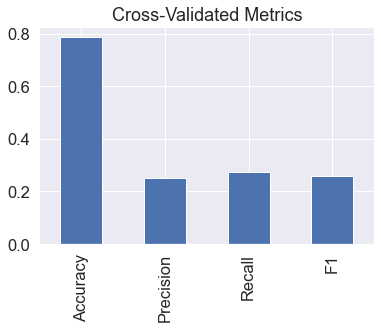

In [56]:
# visualizing metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);